In [5]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


from plotting_functions import *
import math
import csv
import time
from math import log
import networkx as nx
from os import listdir
import random
import io
from io import StringIO
import codecs
import math
from os.path import isfile, join
#from geopy.distance.geodesic import vincenty
# In[2]:
from math import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition

In [30]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_finalv2.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = int(line[6])
        objective_value = float(line[7])
#         print("objective_value",objective_value)
        if objective_value==-1:
            objective_value = 0
        else:
            objective_value = 1
        if  ( t_max in [10] and request_fidelity_threshold in [0.8]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9]
            ):
            scheme = "Strg_Fth = "+str(storage_block_threshold)+",Stg_C="+str(storage_capacity)+",delat"+str(delta)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh]+=objective_value
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= objective_value
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=objective_value
            try:
                each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]+=1
            except:
                try:
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]= 1
                except:
                    each_scheme_each_coherence_time_all_workloads[scheme]={}
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]=1
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,satisfied_number in τ_coh_value_satisfied_number.items():
        
        percentage = satisfied_number/each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]*100
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = percentage
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=percentage
        selected_values.append(percentage)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Percentage of satisfied workloads",
                        18, 18, 14,
                      14, 0, 0,
                      0,0,False,[],max(selected_values)+10,
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,6,2,
                      "plots/QSN_repeater_chain_workload_as_coh_time.pdf",True,2,6.4,3.8,False)

ValueError: max() arg is an empty sequence

we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 10.0 600.0
we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 11.288378916846888 600.0
we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 12.742749857031333 600.000001002524
we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 14.38449888287663 600.0000538083774
we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 16.237767391887218 600.0002353120465
we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 18.329807108324356 600.0008531428377
we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 20.6913808111479 600.0028521875463
we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 23.357214690901227 600.0095093974903
we get the values for scheme Req.Fth=0.6,Strg_Fth = 0.7,Stg_C=100,delat =10 point 26.36650

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


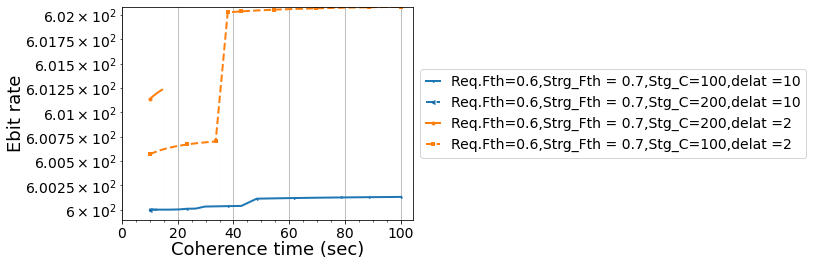

In [62]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = int(line[6])
        objective_value = float(line[7])
#         print("objective_value",objective_value)
        
        if  ( t_max in [10] and request_fidelity_threshold in [0.6,0.8]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9] and storage_block_threshold in [0.9,0.7] and 
             delta in [2,10] 
            ):
            scheme = "Req.Fth="+str(request_fidelity_threshold)+",Strg_Fth = "+str(storage_block_threshold)+",Stg_C="+str(storage_capacity)+",delat ="+str(delta)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=[objective_value]
            
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Ebit rate",
                        18, 18, 14,
                      14, 0, 0,
                      0,0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,14,
                      "plots/QSN_repeater_chain_ebit_as_coh_time.pdf",True,2,11.4,3.8,True)

In [57]:
delat_value = 2
τ_coh = 10
f = 1/2+1/2*(np.exp(-2*delat_value/τ_coh))
F = 0.9
W = (4*F-1)/3
Fe2e = W*f+(1-W)/4
print(F,Fe2e)
delat_value = 2
τ_coh = 100
f = 1/2+1/2*(np.exp(-2*delat_value/τ_coh))
F = 0.9
W = (4*F-1)/3
Fe2e = W*f+(1-W)/4
print(F,Fe2e)


0.9 0.7571386866154437
0.9 0.8830087569660067
